In [90]:
from math import cos, pi
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

In [91]:
@njit
def f(x: np.ndarray):  # функция Растригена от -5.12 до 5.12
    a = 10
    result = 0
    n = len(x)
    for i in range(n):
        result += x[i] ** 2 - a * cos(2 * pi * x[i])

    return a * n + result

In [92]:
@njit
def main(v_max: float):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(10):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((10, dimension - 1))

        for k in range(dimension):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][0], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][0], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
        print(best_solution)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [93]:
list_of_all = main(1.9)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

[7.80314456]
[7.80314456 7.80314456]
[7.80314456 7.80314456 7.80314456]
[7.80314456 7.80314456 7.80314456 7.80314456]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254
 5.47442254]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254
 5.47442254 1.04744245]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254
 5.47442254 1.04744245 1.04744245]
[7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254
 5.47442254 1.04744245 1.04744245 1.04744245]
global_best: 1.047442452405182 coordinates: [1.01122581]
Размерности совпадают:  True


[-0.70887832 -5.03046984  4.96621041 -2.39845712  2.20983308  0.17738289
  2.90691074  1.01122581 -2.94440306 -0.75211159] 
 [ 7.80314456 10.29001724 24.8877703  20.11109243 12.38630656  5.47442254
 10.11244086  1.04744245  1.47744432 10.43300082]


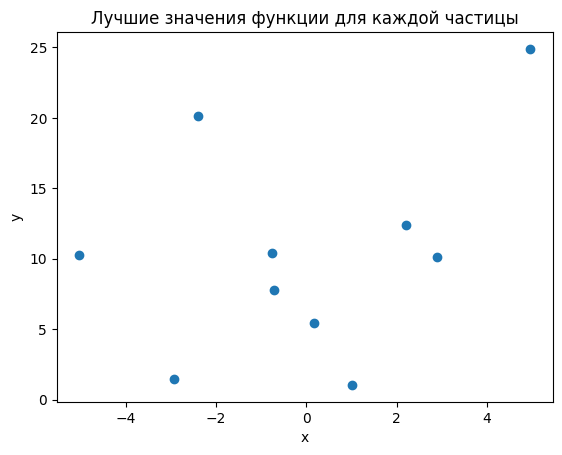

In [94]:
print(list_of_x, "\n", list_of_y)
plt.scatter(list_of_x, list_of_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

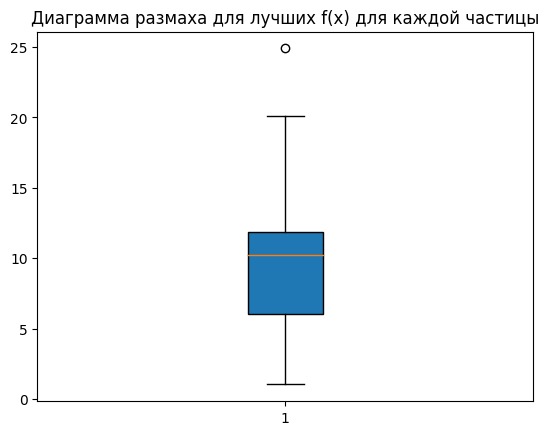

In [95]:
bp = plt.boxplot(list_of_y, patch_artist=True)  # диаграмма размаха для лучших f(x) для каждой частицы
plt.title("Диаграмма размаха для лучших f(x) для каждой частицы")
plt.show()

[1.19112168 1.19112168 1.19112168 1.19112168 1.19112168 2.07738289
 2.07738289 1.01122581 1.01122581 1.01122581] 
 [7.80314456 7.80314456 7.80314456 7.80314456 7.80314456 5.47442254
 5.47442254 1.04744245 1.04744245 1.04744245]


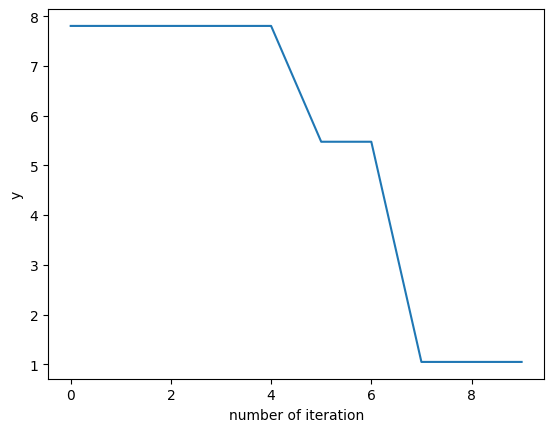

In [96]:
print(list_of_best_coord, "\n", list_of_best_solution)
plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution)
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.show()